### Exploración tiempos espera

### Carga y Análisis General

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../../data/ex1/eventos_espera_semana_nuevo")
df.columns

Index(['ICAO', 'ultimo_parado', 'despegue', 'tiempo_espera', 'aircraft_type',
       'lat', 'lon', 'fecha_despegue', 'hora_despegue', 'runway'],
      dtype='object')

In [18]:
icaos_con_varios_tipos = df[['ICAO', 'aircraft_type']].drop_duplicates()
icaos_con_varios_tipos = icaos_con_varios_tipos.groupby('ICAO').agg({'aircraft_type': 'count'})
icaos_con_varios_tipos = icaos_con_varios_tipos[icaos_con_varios_tipos['aircraft_type'] > 1]
icaos_con_varios_tipos.sort_values(by='aircraft_type', ascending=False)

,aircraft_type
ICAO,
345292,3
34538E,3
344344,3
344307,3
3453CC,3
...,...
AAF828,2
AB84AB,2
E06588,2


In [20]:
df[df['ICAO'] == '345292']

,ICAO,ultimo_parado,despegue,tiempo_espera,aircraft_type,lat,lon,fecha_despegue,hora_despegue,runway
3739,345292,2024-12-04 10:02:44.927,2024-12-04 10:02:56.244,11.317,High vortex aircraft,40.458887,-3.563581,2024-12-04,10,NaN
3740,345292,2024-12-04 10:22:59.000,2024-12-04 10:24:03.322,64.322,High vortex aircraft,40.458922,-3.563565,2024-12-04,10,NaN
3741,345292,2024-12-04 11:36:17.268,2024-12-04 11:36:17.884,0.616,Heavy (larger than 136000 kg),40.498701,-3.582323,2024-12-04,11,NaN
3742,345292,2024-12-04 11:43:08.449,2024-12-04 11:43:12.188,3.739,Heavy (larger than 136000 kg),40.498741,-3.582321,2024-12-04,11,NaN
3743,345292,2024-12-04 12:36:27.071,2024-12-04 12:36:28.092,1.021,High vortex aircraft,40.498666,-3.582386,2024-12-04,12,NaN
3744,345292,2024-12-04 12:37:06.359,2024-12-04 12:37:06.964,0.605,High vortex aircraft,40.498724,-3.582417,2024-12-04,12,NaN
3745,345292,2024-12-05 11:29:29.760,2024-12-05 11:30:01.074,31.314,High vortex aircraft,40.497242,-3.574661,2024-12-05,11,18R/36L
3746,345292,2024-12-05 12:49:25.509,2024-12-05 13:29:41.766,2416.257,Rotorcraft,40.459614,-3.555344,2024-12-05,13,14R/32L
3747,345292,2024-12-06 10:42:51.633,2024-12-06 10:43:12.840,21.207,High vortex aircraft,40.495966,-3.574630,2024-12-06,10,18R/36L


In [79]:
df = df[df["tiempo_espera"] < 1500]

In [80]:
df.shape

(3916, 10)

In [81]:
df.head()

,ICAO,ultimo_parado,despegue,tiempo_espera,aircraft_type,lat,lon,fecha_despegue,hora_despegue,runway
0,3C5434,2024-12-03 08:17:54.070,2024-12-03 08:28:40.767,646.697,High vortex aircraft,40.496109,-3.574646,2024-12-03,8,18R/36L
1,3C5434,2024-12-03 21:14:30.880,2024-12-03 21:14:49.599,18.719,High vortex aircraft,40.504939,-3.559227,2024-12-03,21,18L/36R
2,44046D,2024-12-01 19:13:45.545,2024-12-01 19:31:45.660,1080.115,High vortex aircraft,40.505637,-3.559243,2024-12-01,19,18L/36R
3,4952CE,2024-12-01 06:55:32.575,2024-12-01 06:55:53.525,20.950,High vortex aircraft,40.496990,-3.574631,2024-12-01,6,18R/36L
4,E8043B,2024-12-02 23:45:55.121,2024-12-02 23:46:35.072,39.951,High vortex aircraft,40.497803,-3.574615,2024-12-02,23,18R/36L


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3916 entries, 0 to 4036
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            3916 non-null   object        
 1   ultimo_parado   3916 non-null   datetime64[ns]
 2   despegue        3916 non-null   datetime64[ns]
 3   tiempo_espera   3916 non-null   float64       
 4   aircraft_type   3916 non-null   object        
 5   lat             3916 non-null   float64       
 6   lon             3916 non-null   float64       
 7   fecha_despegue  3916 non-null   object        
 8   hora_despegue   3916 non-null   int64         
 9   runway          3730 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 336.5+ KB


Convertimos las columnas al tipo fecha

In [84]:
df['ultimo_parado'] = pd.to_datetime(df['ultimo_parado'])
df['despegue'] = pd.to_datetime(df['despegue'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3916 entries, 0 to 4036
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            3916 non-null   object        
 1   ultimo_parado   3916 non-null   datetime64[ns]
 2   despegue        3916 non-null   datetime64[ns]
 3   tiempo_espera   3916 non-null   float64       
 4   aircraft_type   3916 non-null   object        
 5   lat             3916 non-null   float64       
 6   lon             3916 non-null   float64       
 7   fecha_despegue  3916 non-null   object        
 8   hora_despegue   3916 non-null   int64         
 9   runway          3730 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 336.5+ KB


In [85]:
df['tiempo_espera'].describe()

count    3916.000000
mean      224.773456
std       302.777599
min         0.000000
25%        24.164750
50%        35.394000
75%       435.396500
max      1424.513000
Name: tiempo_espera, dtype: float64

**El máximo** es bastante sospechoso, tendremos que ver que ha pasado

**La mediana (50 %)** también parece decir cosas extrañas, que para la mitad de los datos los tiempos de espera no pasan del medio minuto

#### Despegues por horas

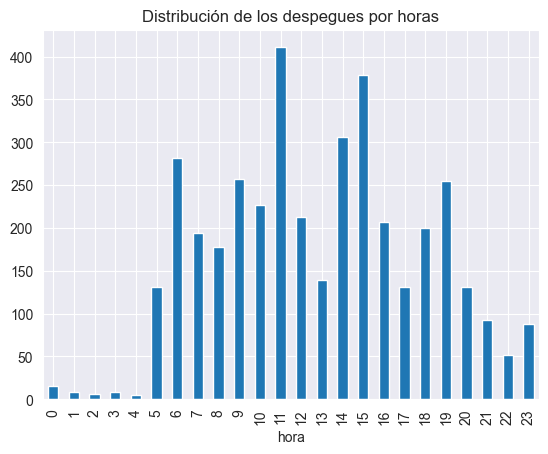

In [86]:
df.hora_despegue.value_counts().sort_index().plot(kind="bar")
plt.title('Distribución de los despegues por horas')
plt.xlabel('hora');

Vemos varias cosas:
- Hay muy pocos datos entre **las 0 y las 4 de la mañana**
- El mayor número de despegues ocurre a las 11 de la mañana

In [76]:
df.despegue.dt.day_of_week.value_counts()

despegue
4    674
0    578
3    565
2    552
1    527
5    523
6    506
Name: count, dtype: int64

#### Despegues por días de la semana

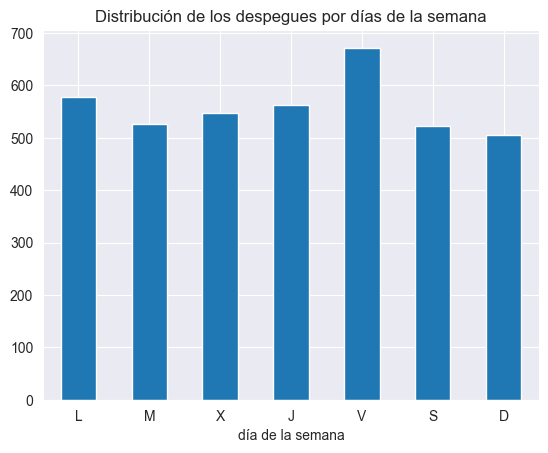

In [87]:
dias_semana = df.despegue.dt.day_of_week.value_counts().sort_index()
dias_semana.index = dias_semana.index.map(lambda x: ['L', 'M', 'X', 'J', 'V', 'S', 'D'][x])
dias_semana.plot(kind="bar")
plt.title('Distribución de los despegues por días de la semana')
plt.xticks(rotation=0)
plt.xlabel('día de la semana');

En este caso las distribución de vuelos parece ser uniforme para los días de las semana, esto es un punto a favor para la consistencias los datos extraídos

**Unstacked bar plot**

### Histograma

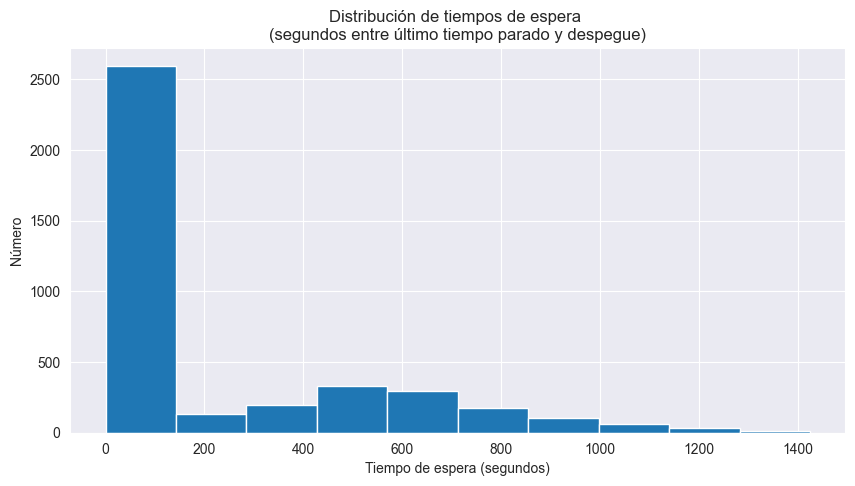

In [88]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df.tiempo_espera.hist(ax=ax);

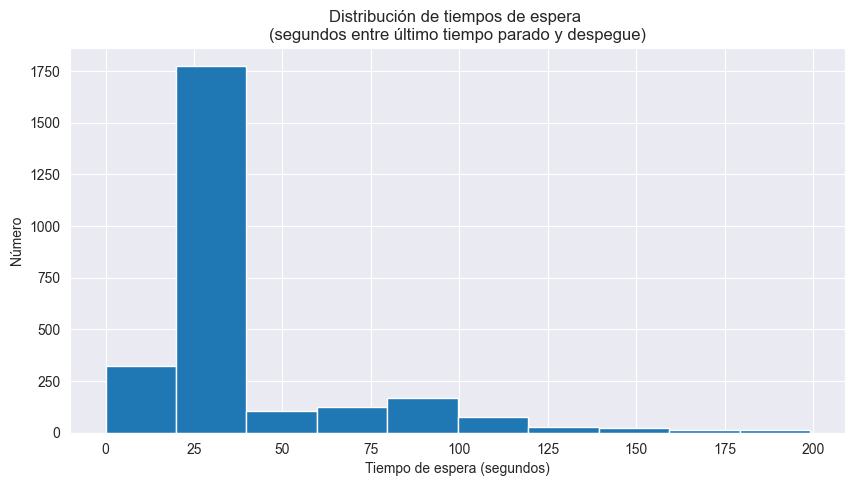

In [89]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df2 = df[df["tiempo_espera"] < 200]
df2.tiempo_espera.hist(ax=ax);

#### Cogemos solo vuelos que se esperan menos de 30 minutos y más de 1

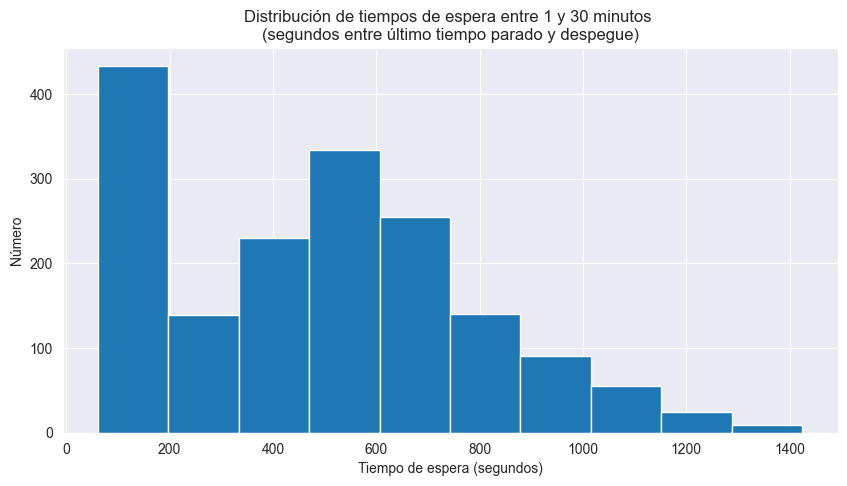

In [90]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera entre 1 y 30 minutos \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')

umbral_low, umbral_high = 1 * 60, 30 * 60
df_entre_5_20 = df[(df.tiempo_espera > umbral_low) & (df.tiempo_espera < umbral_high)]
df_entre_5_20.tiempo_espera.hist(ax=ax);

### Por avión

In [113]:
df['ICAO'].value_counts()

ICAO
34750A    24
347307    23
34750F    22
3453CC    21
34604C    21
          ..
3E5241     1
4BAA6F     1
471F69     1
4BB069     1
4841A6     1
Name: count, Length: 1107, dtype: int64

In [102]:
df = df.dropna(subset = ['runway'])

In [112]:
df.shape

(3719, 10)

In [111]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame y que 'despegue' es de tipo datetime

indices_a_eliminar = []
last_index = None
lastIcao = None
lastDespegue = None

# Iteramos sobre el DataFrame usando iterrows() para obtener el índice de cada fila
for idx, row in df.iterrows():
    if (lastIcao == row['ICAO']) and ((row['despegue'] - lastDespegue) < pd.Timedelta(minutes=5)):
        # Marcamos la fila anterior para eliminarla
        indices_a_eliminar.append(last_index)

    # Actualizamos las variables para la siguiente iteración
    lastIcao = row['ICAO']
    lastDespegue = row['despegue']
    last_index = idx

# Eliminamos todas las filas marcadas de una sola vez
df = df.drop(indices_a_eliminar)



**Bastante raro** que el avión `345385` haya hecho 99 despegues, vamos a verlo

In [109]:
df_345385 = df[df['ICAO'] == "4BC84F"]
df_345385.head(100)

,ICAO,ultimo_parado,despegue,tiempo_espera,aircraft_type,lat,lon,fecha_despegue,hora_despegue,runway
6,4BC84F,2024-12-01 11:59:47.904,2024-12-01 12:16:52.229,1024.325,High vortex aircraft,40.505347,-3.559211,2024-12-01,12,18L/36R
7,4BC84F,2024-12-06 11:59:34.164,2024-12-06 12:15:24.300,950.136,High vortex aircraft,40.505579,-3.559211,2024-12-06,12,18L/36R
8,4BC84F,2024-12-07 12:21:20.344,2024-12-07 12:37:49.044,988.700,High vortex aircraft,40.504637,-3.559211,2024-12-07,12,18L/36R


Parece ser que hay algunos despegues que **tardan 0 segundos**, no tiene sentido ver esos datos.

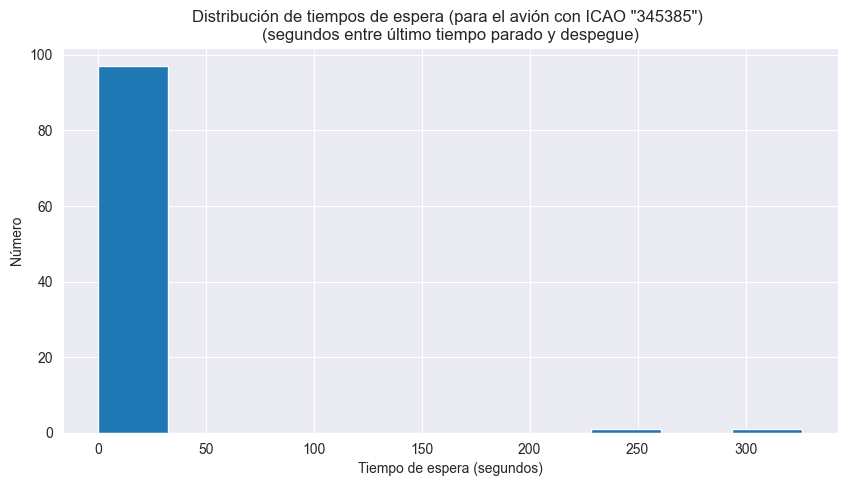

In [17]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera (para el avión con ICAO "345385") \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df_345385.tiempo_espera.hist(ax=ax);

Más del 80 de los despegues son en menos de 1 minuto, hay que ver que ocurre para tiempos menores de 50 segundos solo (hacemos un zoom en el histograma anterior)

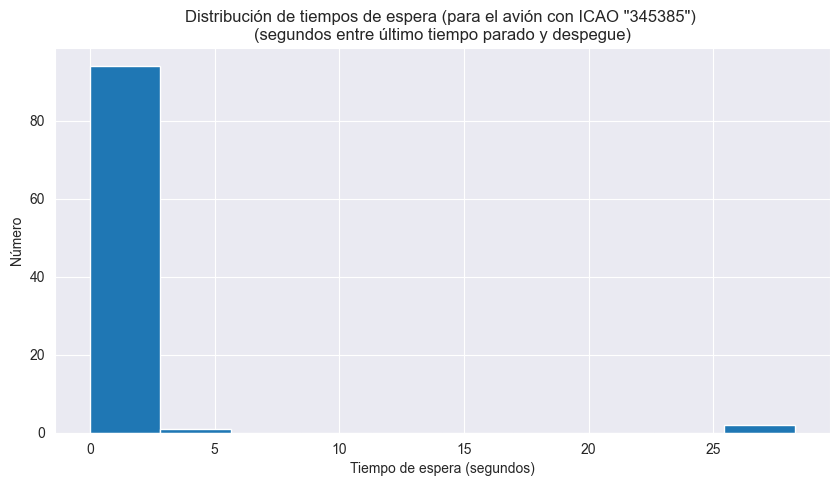

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10, 5))
ax.set_title('Distribución de tiempos de espera (para el avión con ICAO "345385") \n(segundos entre último tiempo parado y despegue)')
ax.set_xlabel('Tiempo de espera (segundos)')
ax.set_ylabel('Número')
df_345385[df_345385.tiempo_espera < 50].tiempo_espera.hist(ax=ax);

Más del 80 de los despegues son en menos de 5 segundos, seguro que se trata de un error.

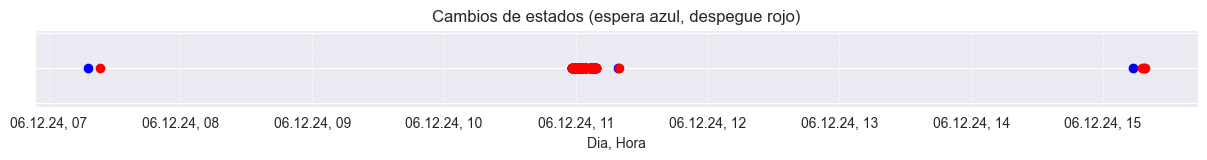

In [19]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(1,1, figsize=(15, 1))

axs.scatter(df_345385.ultimo_parado, [1] * df_345385.shape[0], marker="o", color="blue")
axs.scatter(df_345385.despegue, [1] * df_345385.shape[0], marker="o", color="red")

axs.set_title("Cambios de estados (espera azul, despegue rojo)")
axs.grid(axis='x', linestyle='--', alpha=0.6)

axs.set_yticklabels([])
axs.set_xlabel("Dia, Hora")
myFmt = mdates.DateFormatter('%d.%m.%y, %H')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
axs.xaxis.set_major_formatter(myFmt);

Todos los datos son para **del 6 de DICIEMBRE**

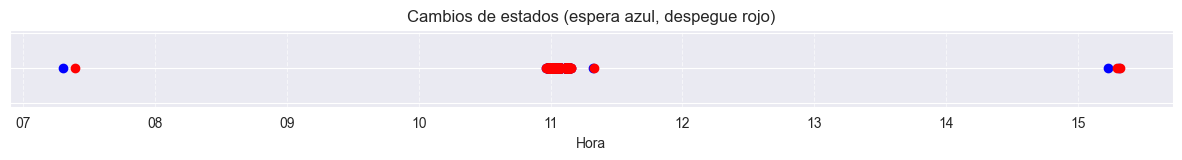

In [20]:
fig, axs = plt.subplots(1,1, figsize=(15, 1))

axs.scatter(df_345385.ultimo_parado, [1] * df_345385.shape[0], marker="o", color="blue")
axs.scatter(df_345385.despegue, [1] * df_345385.shape[0], marker="o", color="red")

axs.set_title("Cambios de estados (espera azul, despegue rojo)")
axs.grid(axis='x', linestyle='--', alpha=0.6)

axs.set_yticklabels([])
axs.set_xlabel("Hora")
myFmt = mdates.DateFormatter('%H')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
axs.xaxis.set_major_formatter(myFmt);

In [21]:
df[df.tiempo_espera < 1]

,ICAO,ultimo_parado,despegue,tiempo_espera,aircraft_type,lat,lon,fecha_despegue,hora_despegue,runway
415,343650,2024-12-01 00:28:59.071,2024-12-01 00:28:59.879,0.808,High vortex aircraft,40.499107,-3.591324,2024-12-01,0,NaN
416,343650,2024-12-01 00:28:59.879,2024-12-01 00:29:00.281,0.402,High vortex aircraft,40.499109,-3.591328,2024-12-01,0,NaN
417,343650,2024-12-01 00:29:00.281,2024-12-01 00:29:00.688,0.407,High vortex aircraft,40.499107,-3.591324,2024-12-01,0,NaN
418,343650,2024-12-01 00:29:12.527,2024-12-01 00:29:13.341,0.814,High vortex aircraft,40.499107,-3.591324,2024-12-01,0,NaN
433,343650,2024-12-04 18:52:59.726,2024-12-04 18:53:00.402,0.676,High vortex aircraft,40.496132,-3.589020,2024-12-04,18,NaN
...,...,...,...,...,...,...,...,...,...,...
2618,345385,2024-12-06 11:08:58.981,2024-12-06 11:08:59.060,0.079,High vortex aircraft,40.497479,-3.591687,2024-12-06,11,NaN
2619,345385,2024-12-06 11:09:03.436,2024-12-06 11:09:04.216,0.780,High vortex aircraft,40.497479,-3.591687,2024-12-06,11,NaN
2976,3452C7,2024-12-04 07:53:16.211,2024-12-04 07:53:17.052,0.841,Heavy (larger than 136000 kg),40.500652,-3.559189,2024-12-04,7,18L/36R
3741,345292,2024-12-04 11:36:17.268,2024-12-04 11:36:17.884,0.616,Heavy (larger than 136000 kg),40.498701,-3.582323,2024-12-04,11,NaN


### Boxplot

Cogemos los 10 aviones con mas filas sobre tiempos de espera

In [22]:
top_10_most_frequent = df.ICAO.value_counts()[:10]
top_10_most_frequent

ICAO
345385    99
343650    30
345597    27
344195    25
34604C    25
34750A    24
34750F    24
347307    23
345698    23
34604B    22
Name: count, dtype: int64

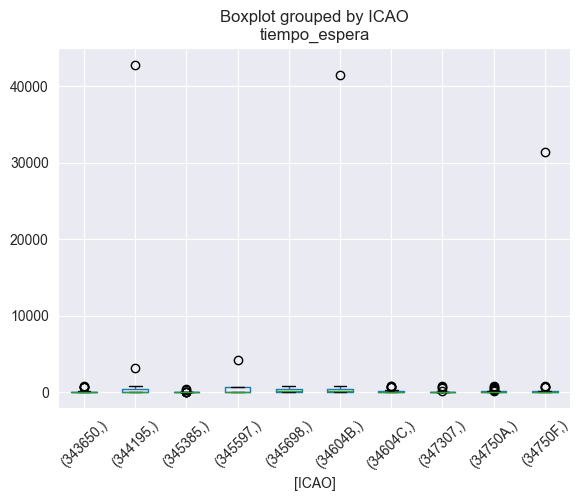

In [23]:
df[df.ICAO.isin(top_10_most_frequent.index)].boxplot(column=['tiempo_espera'], by=['ICAO'])
plt.xticks(rotation=45);

No es casi nada informativo por los outliers, vamos a realizar una selección de los datos, como hacíamos en los histogramas

**Decartamos filas con tiempo inferior a 1 minuto y superiores a 30 minutos**

Cogemos los 10 aviones con mas filas sobre tiempos de espera

In [24]:
df_from_1_min = df[(df.tiempo_espera > 60) & (df.tiempo_espera < 1800)]
top_10_most_frequent = df_from_1_min.ICAO.value_counts()[:10]
top_10_most_frequent

ICAO
34604B    13
345698    12
344417    12
344446    12
34660B    12
34134E    12
345583    12
345597    12
34604C    12
342091    11
Name: count, dtype: int64

En este caso lo bueno es que tienen un número similar de filas

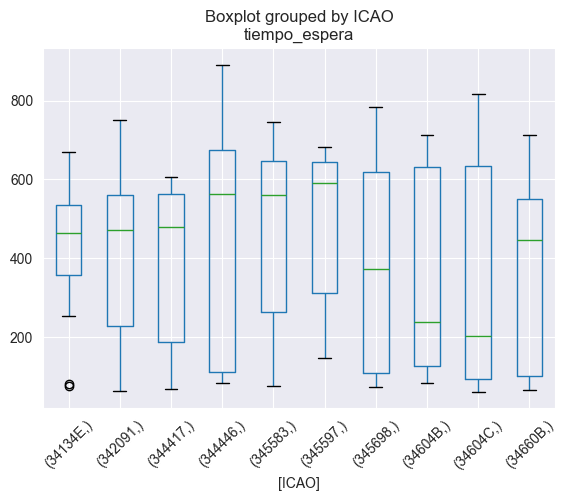

In [25]:
df_from_1_min[df_from_1_min.ICAO.isin(top_10_most_frequent.index)].boxplot(column=['tiempo_espera'], by=['ICAO'])
plt.xticks(rotation=45);

En este caso se pueden sacar algunos resultados.

Las medianas de los tiempos son muy diferentes, en un caso siendo 3 minutos (200 segundos) y en otros alrededor de 7 minutos (450 segundos)

In [26]:
import seaborn as sns

In [27]:
df['tiempo_espera'].describe()

count      4038.000000
mean       1759.392035
std       20034.703016
min           0.000000
25%          24.308000
50%          36.978500
75%         477.867750
max      518771.655000
Name: tiempo_espera, dtype: float64

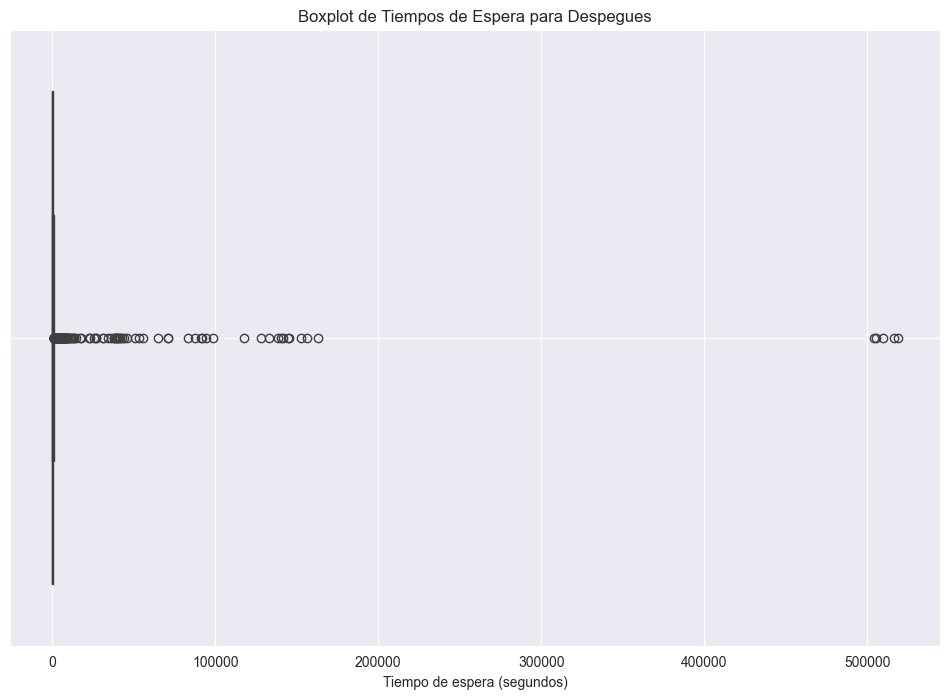

In [28]:
plt.figure(figsize=(12, 8))  # Tamaño de la figura
sns.boxplot(x=df['tiempo_espera'])
plt.title('Boxplot de Tiempos de Espera para Despegues')  # Título del gráfico
plt.xlabel('Tiempo de espera (segundos)')  # Etiqueta del eje X
plt.grid(True)  # Añadir una cuadrícula para mejor visualización
plt.show()

In [29]:
df

,ICAO,ultimo_parado,despegue,tiempo_espera,aircraft_type,lat,lon,fecha_despegue,hora_despegue,runway
0,3C5434,2024-12-03 08:17:54.070,2024-12-03 08:28:40.767,646.697,High vortex aircraft,40.496109,-3.574646,2024-12-03,8,18R/36L
1,3C5434,2024-12-03 21:14:30.880,2024-12-03 21:14:49.599,18.719,High vortex aircraft,40.504939,-3.559227,2024-12-03,21,18L/36R
2,44046D,2024-12-01 19:13:45.545,2024-12-01 19:31:45.660,1080.115,High vortex aircraft,40.505637,-3.559243,2024-12-01,19,18L/36R
3,4952CE,2024-12-01 06:55:32.575,2024-12-01 06:55:53.525,20.950,High vortex aircraft,40.496990,-3.574631,2024-12-01,6,18R/36L
4,E8043B,2024-12-02 23:45:55.121,2024-12-02 23:46:35.072,39.951,High vortex aircraft,40.497803,-3.574615,2024-12-02,23,18R/36L
...,...,...,...,...,...,...,...,...,...,...
4033,4D24C4,2024-12-01 20:13:19.998,2024-12-07 17:47:15.489,509635.491,High vortex aircraft,40.469490,-3.566833,2024-12-07,17,14R/32L
4034,4D24C4,2024-12-07 20:13:29.428,2024-12-07 20:15:19.335,109.907,High vortex aircraft,40.505428,-3.559227,2024-12-07,20,18L/36R
4035,A07176,2024-12-02 10:08:36.593,2024-12-02 10:10:56.205,139.612,High vortex aircraft,40.481152,-3.572220,2024-12-02,10,14R/32L
4036,A07176,2024-12-05 23:06:11.578,2024-12-05 23:06:50.548,38.970,High vortex aircraft,40.497828,-3.574630,2024-12-05,23,18R/36L


In [37]:
df['ultimo_parado'] = pd.to_datetime(df['ultimo_parado'])
df['despegue'] = pd.to_datetime(df['despegue'])
df['fecha_despegue'] = pd.to_datetime(df['fecha_despegue'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ICAO            4038 non-null   object        
 1   ultimo_parado   4038 non-null   datetime64[ns]
 2   despegue        4038 non-null   datetime64[ns]
 3   tiempo_espera   4038 non-null   float64       
 4   aircraft_type   4038 non-null   object        
 5   lat             4038 non-null   float64       
 6   lon             4038 non-null   float64       
 7   fecha_despegue  4038 non-null   datetime64[ns]
 8   hora_despegue   4038 non-null   int64         
 9   runway          3808 non-null   object        
dtypes: datetime64[ns](3), float64(3), int64(1), object(3)
memory usage: 315.6+ KB


In [31]:
df['hora_despegue'] = df['hora_despegue'].astype(int)

In [32]:
print(df['aircraft_type'].unique())

['High vortex aircraft' 'Heavy (larger than 136000 kg)' 'Rotorcraft']


In [33]:
print(df.groupby('aircraft_type')['tiempo_espera'].max())

aircraft_type
Heavy (larger than 136000 kg)     25348.551
High vortex aircraft             518771.655
Rotorcraft                       504118.553
Name: tiempo_espera, dtype: float64


## Tipos de Aeronaves

### High vortex aircraft
- **Descripción**: Aeronaves que generan vórtices de estela significativos debido a su gran envergadura y superficie alar.
- **Ejemplos**:
  - **Boeing 777**: Utilizado para vuelos comerciales de larga distancia.
  - **Airbus A350**: Utilizado en rutas intercontinentales.

### Heavy (larger than 136000 kg)
- **Descripción**: Aviones con un peso de despegue superior a 136,000 kg, generalmente grandes aviones de pasajeros de cuerpo ancho o aviones de carga.
- **Ejemplos**:
  - **Boeing 747**: Utilizado tanto para pasajeros como para carga, conocido por su tamaño y capacidad.
  - **Airbus A380**: El avión de pasajeros más grande del mundo, usado en rutas internacionales.

### Rotorcraft
- **Descripción**: Aeronaves que utilizan rotores para generar sustentación, como helicópteros y girocópteros.
- **Ejemplos**:
  - **Sikorsky UH-60 Black Hawk**: Helicóptero militar multifunción.
  - **Eurocopter EC135**: Helicóptero ligero utilizado en servicios médicos de emergencia y transporte corporativo.


In [34]:
print(df["aircraft_type"].value_counts())

aircraft_type
High vortex aircraft             3616
Heavy (larger than 136000 kg)     375
Rotorcraft                         47
Name: count, dtype: int64


## Boxplot por tipo de avión

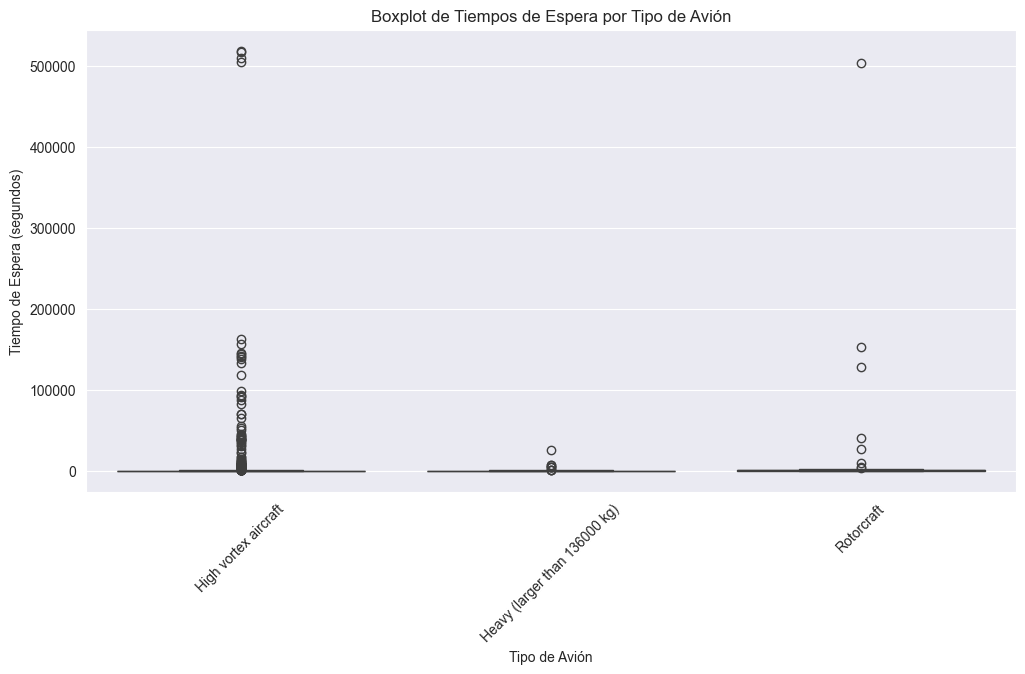

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='aircraft_type', y='tiempo_espera', data=df)
plt.title('Boxplot de Tiempos de Espera por Tipo de Avión')
plt.xlabel('Tipo de Avión')
plt.ylabel('Tiempo de Espera (segundos)')
plt.xticks(rotation=45)
plt.show()

Podemos ver que los aviones de pasajeros son mucho más comunes que otras vehículos como los  helicopteros. Además podemos apreciar que estas aeronaves que usan rotores no simpre son muy prioritarios, por lo que tienen más retrasos y más largos que los vuelos normales. Por otro lado, apreciamos que los aviones 'High Vortex Aircraft' son los más comunes por mucho. Esto puede deberse a que estos son tanto aviones de pasajeros que hacen vuelos más largos como aviones de carga. Además esto explicaría que en esta categoría tengamos vuelos con tantos tiempos de espera comparados con los 'Heavy' que representarían los vuelos más cortos y de pasajeros, ya que los vuelos de suelen tener menos prioridad y tiene tiempos de espera más largos. Además al ser vuelos que generan un gran vórtice de estela debido a su tamaño son más dificiles de coordinar que el resto. Por último resulta ver que tanto en High Vortex como en Rotorcraft tenemos varios casos con tiempos de espera de 500000, es decir, casi un año. Lo que resulta bastante raro y parece ser un error en los datos

b## Mapa  de calor (días/horas)

C:\Users\alvar\AppData\Local\Temp\ipykernel_7468\4586856.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


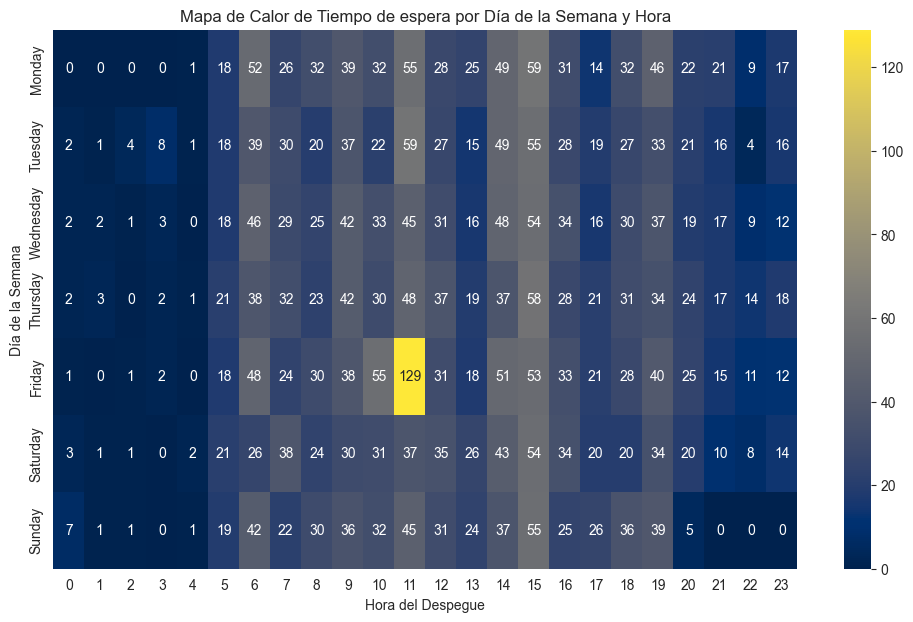

In [39]:
# Agregar columna de día de la semana
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['dia_semana'] = pd.Categorical(df['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)

# Crear tabla pivot
pivot_table = df.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)

# Mapa de calor de despegues por día de la semana y hora
plt.figure(figsize=(12, 7))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="cividis")
plt.title('Mapa de Calor de Tiempo de espera por Día de la Semana y Hora')
plt.xlabel('Hora del Despegue')
plt.ylabel('Día de la Semana')
plt.show()


## Mapa de calor (tipo de avión, días, horas)

C:\Users\alvar\AppData\Local\Temp\ipykernel_7468\2899263354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_7468\2899263354.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


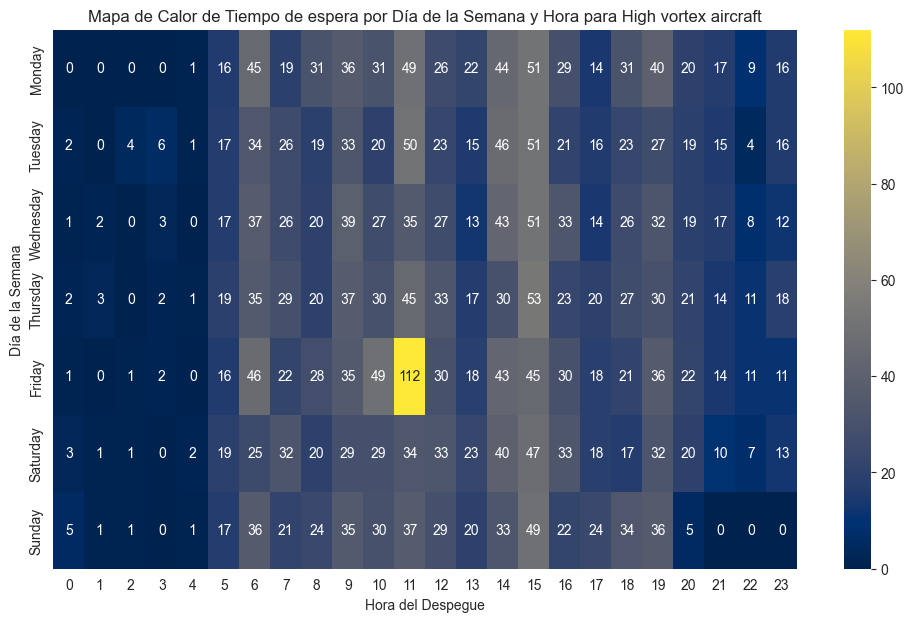

C:\Users\alvar\AppData\Local\Temp\ipykernel_7468\2899263354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_7468\2899263354.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


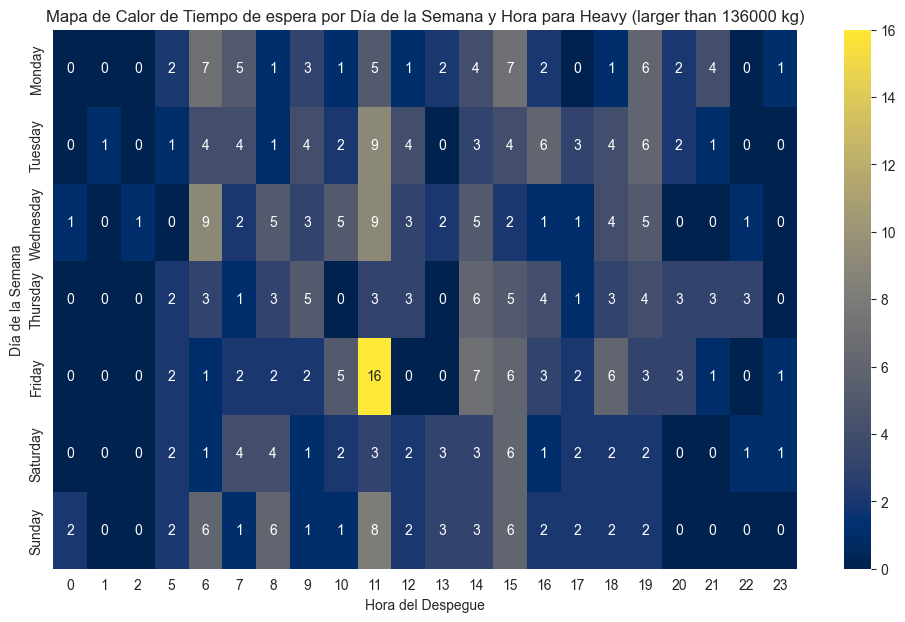

C:\Users\alvar\AppData\Local\Temp\ipykernel_7468\2899263354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_7468\2899263354.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)


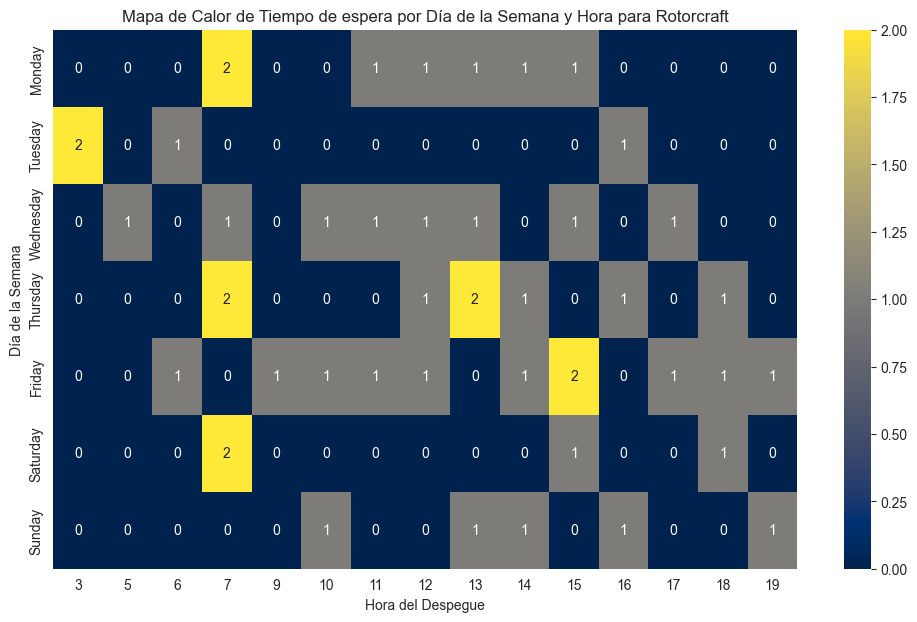

In [41]:
# Obtener los tipos de avión únicos
tipos_de_avion = df['aircraft_type'].unique()

for tipo in tipos_de_avion:
    df_filtrado = df[df['aircraft_type'] == tipo]
    df_filtrado['dia_semana'] = pd.Categorical(df_filtrado['fecha_despegue'].dt.day_name(), categories=day_order, ordered=True)

    # Crear la tabla pivotante
    pivot_table = df_filtrado.pivot_table(index='dia_semana', columns='hora_despegue', values='tiempo_espera', aggfunc='count', fill_value=0)

    # Generar el mapa de calor
    plt.figure(figsize=(12, 7))
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="cividis")
    plt.title(f'Mapa de Calor de Tiempo de espera por Día de la Semana y Hora para {tipo}')
    plt.xlabel('Hora del Despegue')
    plt.ylabel('Día de la Semana')
    plt.show()

Podemos ver que tanto 'High Vortex Aircraft' como 'Heavy' siguen más o menos la misma estructura, destacando el viernes a las 11 de la mañana como el momento en el que más retraso tienen los vuelos en ambos. Lo cual tiene sentido ya que es cuando la gente suele irse de viaje para aprovechar el viernes y el fin de semana. Por otro lado, las aeronaves 'Rotorcraft' no parecen seguir una estructura clara: esto puede ser debido a que ser vehiculos con usos mucho más limitados, son utilizados cuando son requeridos, lo cual no depende de ningún patrón

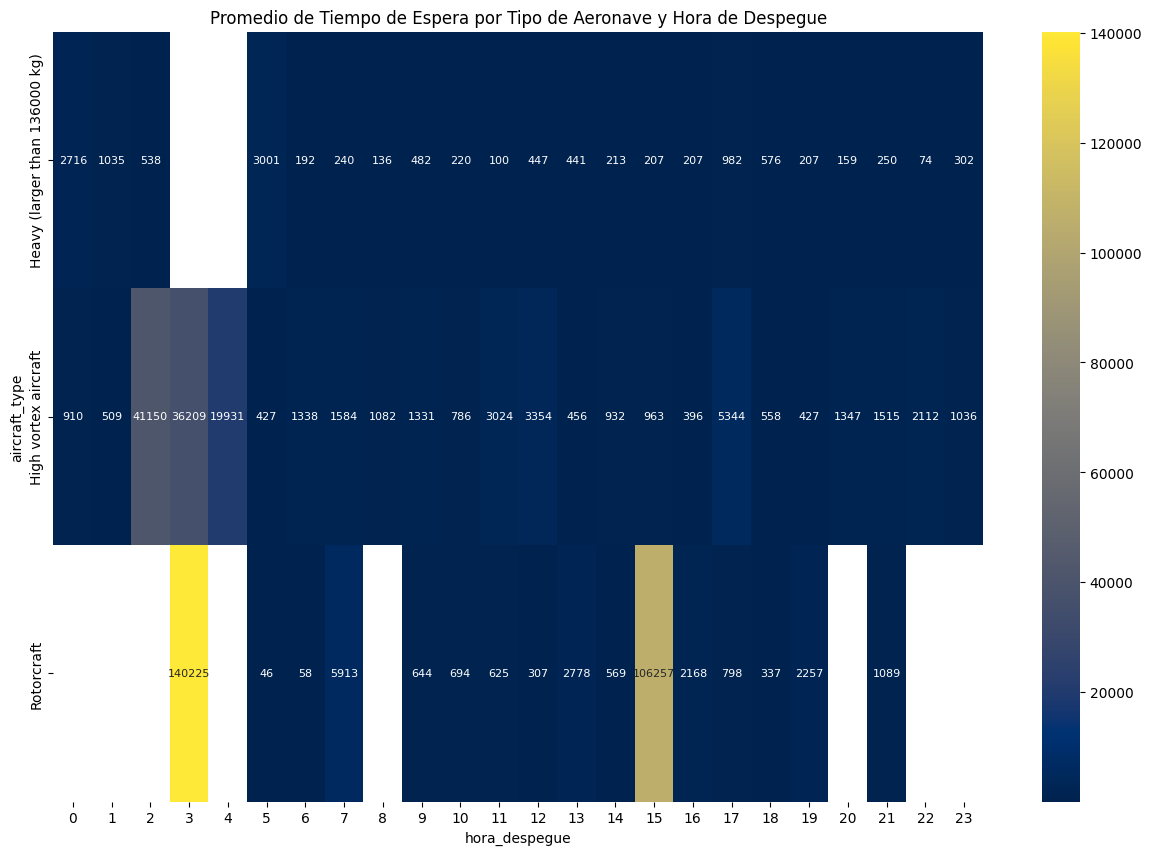

In [113]:
pivot_data = df.pivot_table(values='tiempo_espera', index='aircraft_type', columns='hora_despegue', aggfunc='mean')


plt.figure(figsize=(15, 10))  # Aumentar el tamaño de la figura
sns.heatmap(pivot_data, cmap="cividis", annot=True, fmt=".0f", annot_kws={"size": 8})  # Cambiar la paleta y ajustar tamaño de anotación
plt.title("Promedio de Tiempo de Espera por Tipo de Aeronave y Hora de Despegue")
plt.show()

Podemos ver que las horas en las que más esperan las aeronaves 'Rotorcraft' son las 3 de la mañana y las 3 de la tarde. Creemos que es simple coinicdencia, pero podría haber una justificación detrás de esto que no hemos encontrado. Las 'Heavy' no suelen tener que esperar mucho de media, siendo las5 de la mañana la hora en la que más esperan. Por último, las 'High Vortex'esperan m´s timepo entre las 2 y 4 de la mañana. Probablemente a estas horas sea cuando despegan los aviones de carga, ya que durante el día podrían interferir con los aviones de pasajeros. Estas aeronaves  de carga son menos prioritarias por lo general que las aeronaves de pasajeros, por lo que tienden a esperar más timepo.